In [219]:
import pyspark as ps
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')
import time
import datetime
import numpy as np
import scipy.stats as stats

In [3]:
spark = (ps.sql.SparkSession
         .builder
         .master('local[4]')
         .appName('lecture')
         .getOrCreate()
        )
sc = spark.sparkContext

In [4]:
league = pd.read_csv('league-tables/result.csv')
league

,year,title,Team,A,D,F,GD,L,P,Pos,Pts,W
0,2016/2017,Premier League 2016-2017,Chelsea,33,3,85,52,5,38,1,93,30
1,2016/2017,Premier League 2016-2017,Tottenham Hotspurs,26,8,86,60,4,38,2,86,26
2,2016/2017,Premier League 2016-2017,Manchester City,39,9,80,41,6,38,3,78,23
3,2016/2017,Premier League 2016-2017,Liverpool,42,10,78,36,6,38,4,76,22
4,2016/2017,Premier League 2016-2017,Arsenal,44,6,77,33,9,38,5,75,23
...,...,...,...,...,...,...,...,...,...,...,...,...
1338,1888/1889,First Division 1888-89,Everton,46,2,35,-11,11,22,8,20,9
1339,1888/1889,First Division 1888-89,Burnley,62,3,42,-20,12,22,9,17,7
1340,1888/1889,First Division 1888-89,Derby County,60,2,41,-19,13,22,10,16,7
1341,1888/1889,First Division 1888-89,Notts County,73,2,39,-34,15,22,11,12,5


In [5]:
cols = league.columns.tolist()
cols

['year', 'title', 'Team', 'A', 'D', 'F', 'GD', 'L', 'P', 'Pos', 'Pts', 'W']

In [6]:
cols = ['year', 'Team', 'Pos', 'P', 'Pts', 'W', 'D', 'L', 'F', 'A', 'GD', 'title']

In [7]:
league = league[cols]

In [8]:
league2016 = league[0:20]
teams2016=league2016.Team.unique()

In [9]:
chelsea_pos = league[league['Team'] == 'Chelsea']
mancity_pos = league[league['Team'] == 'Manchester City']
manutd_pos = league[league['Team'] == 'Manchester United']
arsenal_pos = league[league['Team'] == 'Arsenal']

In [10]:
league2016

,year,Team,Pos,P,Pts,W,D,L,F,A,GD,title
0,2016/2017,Chelsea,1,38,93,30,3,5,85,33,52,Premier League 2016-2017
1,2016/2017,Tottenham Hotspurs,2,38,86,26,8,4,86,26,60,Premier League 2016-2017
2,2016/2017,Manchester City,3,38,78,23,9,6,80,39,41,Premier League 2016-2017
3,2016/2017,Liverpool,4,38,76,22,10,6,78,42,36,Premier League 2016-2017
4,2016/2017,Arsenal,5,38,75,23,6,9,77,44,33,Premier League 2016-2017
5,2016/2017,Manchester United,6,38,69,18,15,5,54,29,25,Premier League 2016-2017
6,2016/2017,Everton,7,38,61,17,10,11,62,44,18,Premier League 2016-2017
7,2016/2017,Southampton,8,38,46,12,10,16,41,48,-7,Premier League 2016-2017
8,2016/2017,Bournemouth,9,38,46,12,10,16,55,67,-12,Premier League 2016-2017
9,2016/2017,West Bromwich Albion,10,38,45,12,9,17,43,51,-8,Premier League 2016-2017


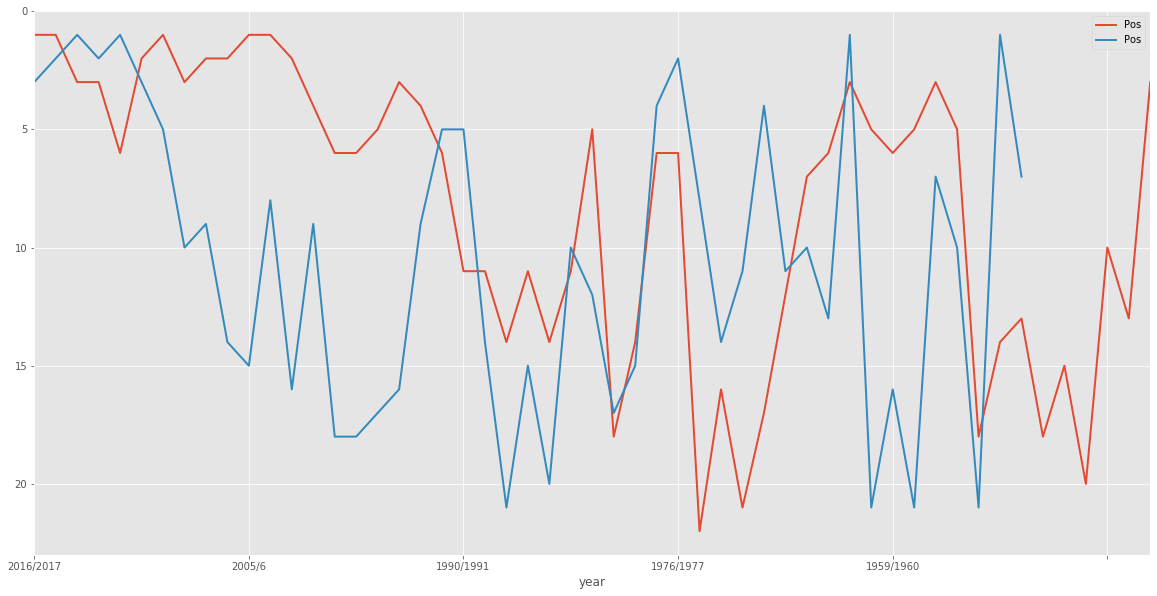

In [11]:
fig, ax = plt.subplots(figsize = [20,10])
ax.set_ylim(23, 0)
chelsea_pos.plot(ax = ax, x = 'year', y = 'Pos', linewidth = 2)
mancity_pos.plot(ax = ax, x = 'year', y = 'Pos', linewidth = 2)
# manutd_pos.plot(ax = ax, x = 'year', y = 'Pos', linewidth = 2)
# arsenal_pos.plot(ax = ax, x = 'year', y = 'Pos', linewidth = 2)

In [12]:
teams = league.Team.unique()
prominent_teams = ["Manchester United", "Liverpool", "Chelsea", "Manchester City", 'Arsenal', 'Tottenham Hotspurs']

Text(0, 0.5, 'Position')

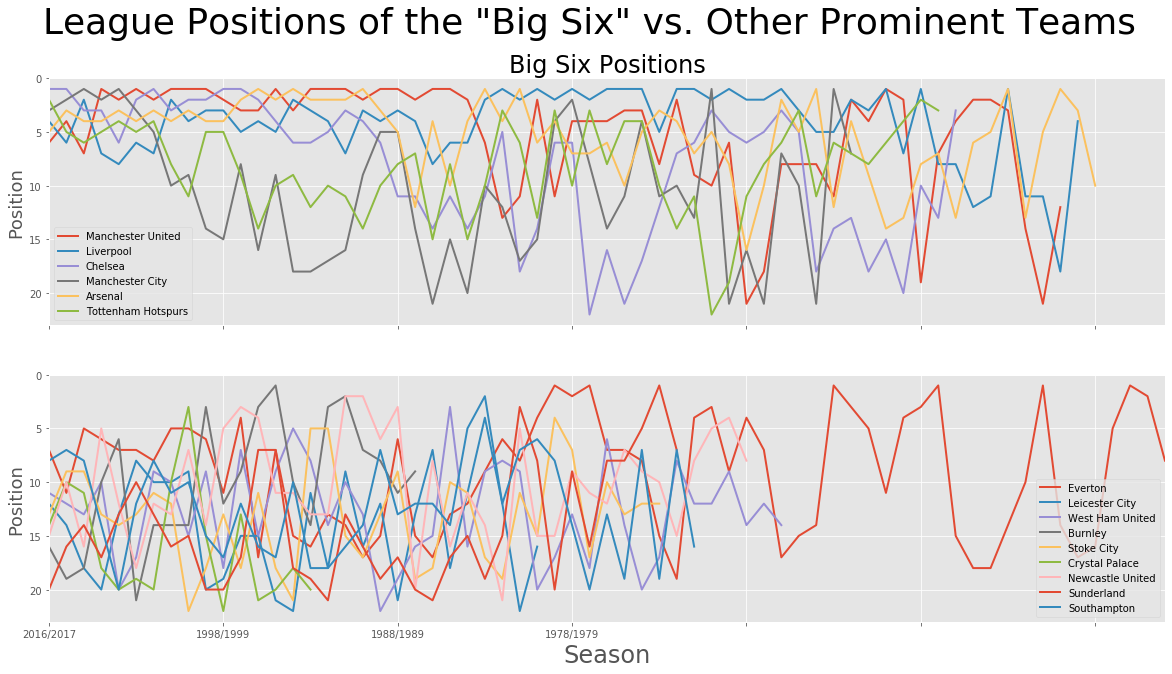

In [15]:
fig, ax = plt.subplots(2, sharex = True, figsize = [20,10])
fig.suptitle('League Positions of the "Big Six" vs. Other Prominent Teams', fontsize =36)
ax[0].set_ylim(23, 0)
ax[1].set_ylim(23, 0)
for i in prominent_teams:
    pos = league[league['Team'] == i]
    pos.plot(ax=ax[0], x = 'year', y = 'Pos', linewidth = 2, label = i)
for i in lasting_teams:
    pos = league[league['Team'] == i]
    pos.plot(ax=ax[1], x = 'year', y = 'Pos', linewidth = 2, label = i)
    
ax[0].set_title('Big Six Positions', fontsize = 24)
ax[1].set_xlabel('Season', fontsize = 24)
ax[0].set_ylabel('Position', fontsize =18)
ax[1].set_ylabel('Position', fontsize = 18)

In [14]:
lasting_teams = ['Everton', 'Leicester City', 'West Ham United', 'Burnley', 'Stoke City', 'Crystal Palace','Newcastle United', 'Sunderland', 'Southampton']

In [16]:
league

,year,Team,Pos,P,Pts,W,D,L,F,A,GD,title
0,2016/2017,Chelsea,1,38,93,30,3,5,85,33,52,Premier League 2016-2017
1,2016/2017,Tottenham Hotspurs,2,38,86,26,8,4,86,26,60,Premier League 2016-2017
2,2016/2017,Manchester City,3,38,78,23,9,6,80,39,41,Premier League 2016-2017
3,2016/2017,Liverpool,4,38,76,22,10,6,78,42,36,Premier League 2016-2017
4,2016/2017,Arsenal,5,38,75,23,6,9,77,44,33,Premier League 2016-2017
...,...,...,...,...,...,...,...,...,...,...,...,...
1338,1888/1889,Everton,8,22,20,9,2,11,35,46,-11,First Division 1888-89
1339,1888/1889,Burnley,9,22,17,7,3,12,42,62,-20,First Division 1888-89
1340,1888/1889,Derby County,10,22,16,7,2,13,41,60,-19,First Division 1888-89
1341,1888/1889,Notts County,11,22,12,5,2,15,39,73,-34,First Division 1888-89
